<a href="https://colab.research.google.com/github/MiguelAngel-ht/Notas-Introduccion-a-la-IA/blob/main/06-K-Medias-Segmentaci%C3%B3n/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar pandas
import pandas as pd

# Leer datos y mostrar
datos = pd.read_csv("U5_02_housing.csv")
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

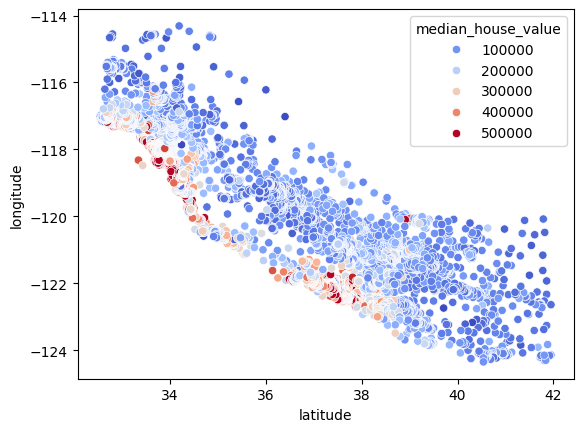

In [2]:
# Mostrar datos hubicados geográficamente por color de precio de viviendas
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

TypeError: cannot convert the series to <class 'float'>

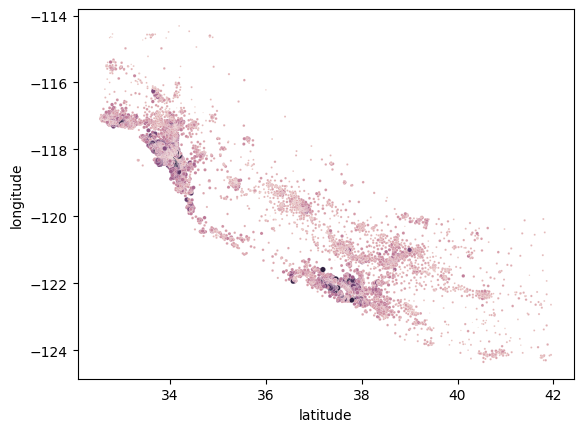

In [3]:
# Mismo gráfico tomando en cuenta el ingreso medio del lugar
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income",
               s=datos["median_income"])

In [4]:
# Segmentación de lugares por ingreso y ubicación
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Resultados de nuestra segmentación
X["segmento_economico"] = predicciones

<Axes: xlabel='latitude', ylabel='longitude'>

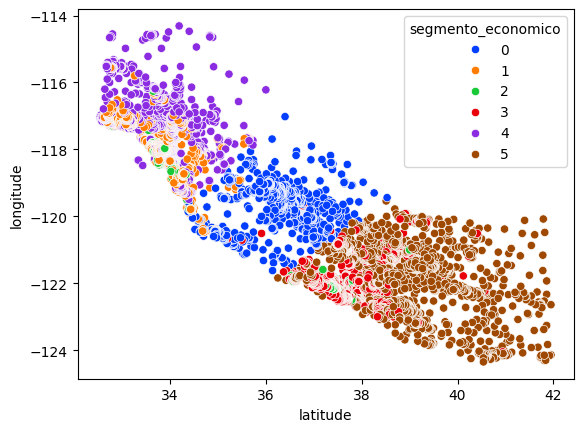

In [10]:
# Lugares por clases segmentadas con K-Medias
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

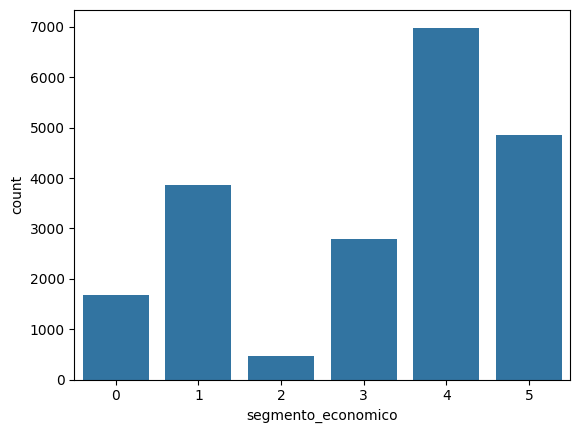

In [8]:
# Conteo por clase
sb.countplot(x="segmento_economico", data=X)

In [9]:
# Ingreso medio de cada clase
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.667760
1     5.507577
2    10.946702
3     5.503269
4     2.868666
5     2.814560
Name: median_income, dtype: float64